In [1]:
#download data from kaggle
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [3]:
# imputing missing values in num_cols
from sklearn.impute import SimpleImputer
# scaling numeric value in 1-0 range
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer

# encode categorical cols in one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Combine the numerical and categorical pipelines
from sklearn.compose import ColumnTransformer

In [4]:
od.download("https://www.kaggle.com/competitions/playground-series-s4e11/data")
# hemantk777   721b095dacb7cfa6129768282921b8fb

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemantk777
Your Kaggle Key: ··········


100%|██████████| 4.55M/4.55M [00:00<00:00, 138MB/s]


Extracting archive ./playground-series-s4e11/playground-series-s4e11.zip to ./playground-series-s4e11


In [5]:
MH_data=pd.read_csv("/content/playground-series-s4e11/train.csv")

test_data=pd.read_csv("/content/playground-series-s4e11/test.csv")
#test_data.head(2)
MH_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
MH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
MH_data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


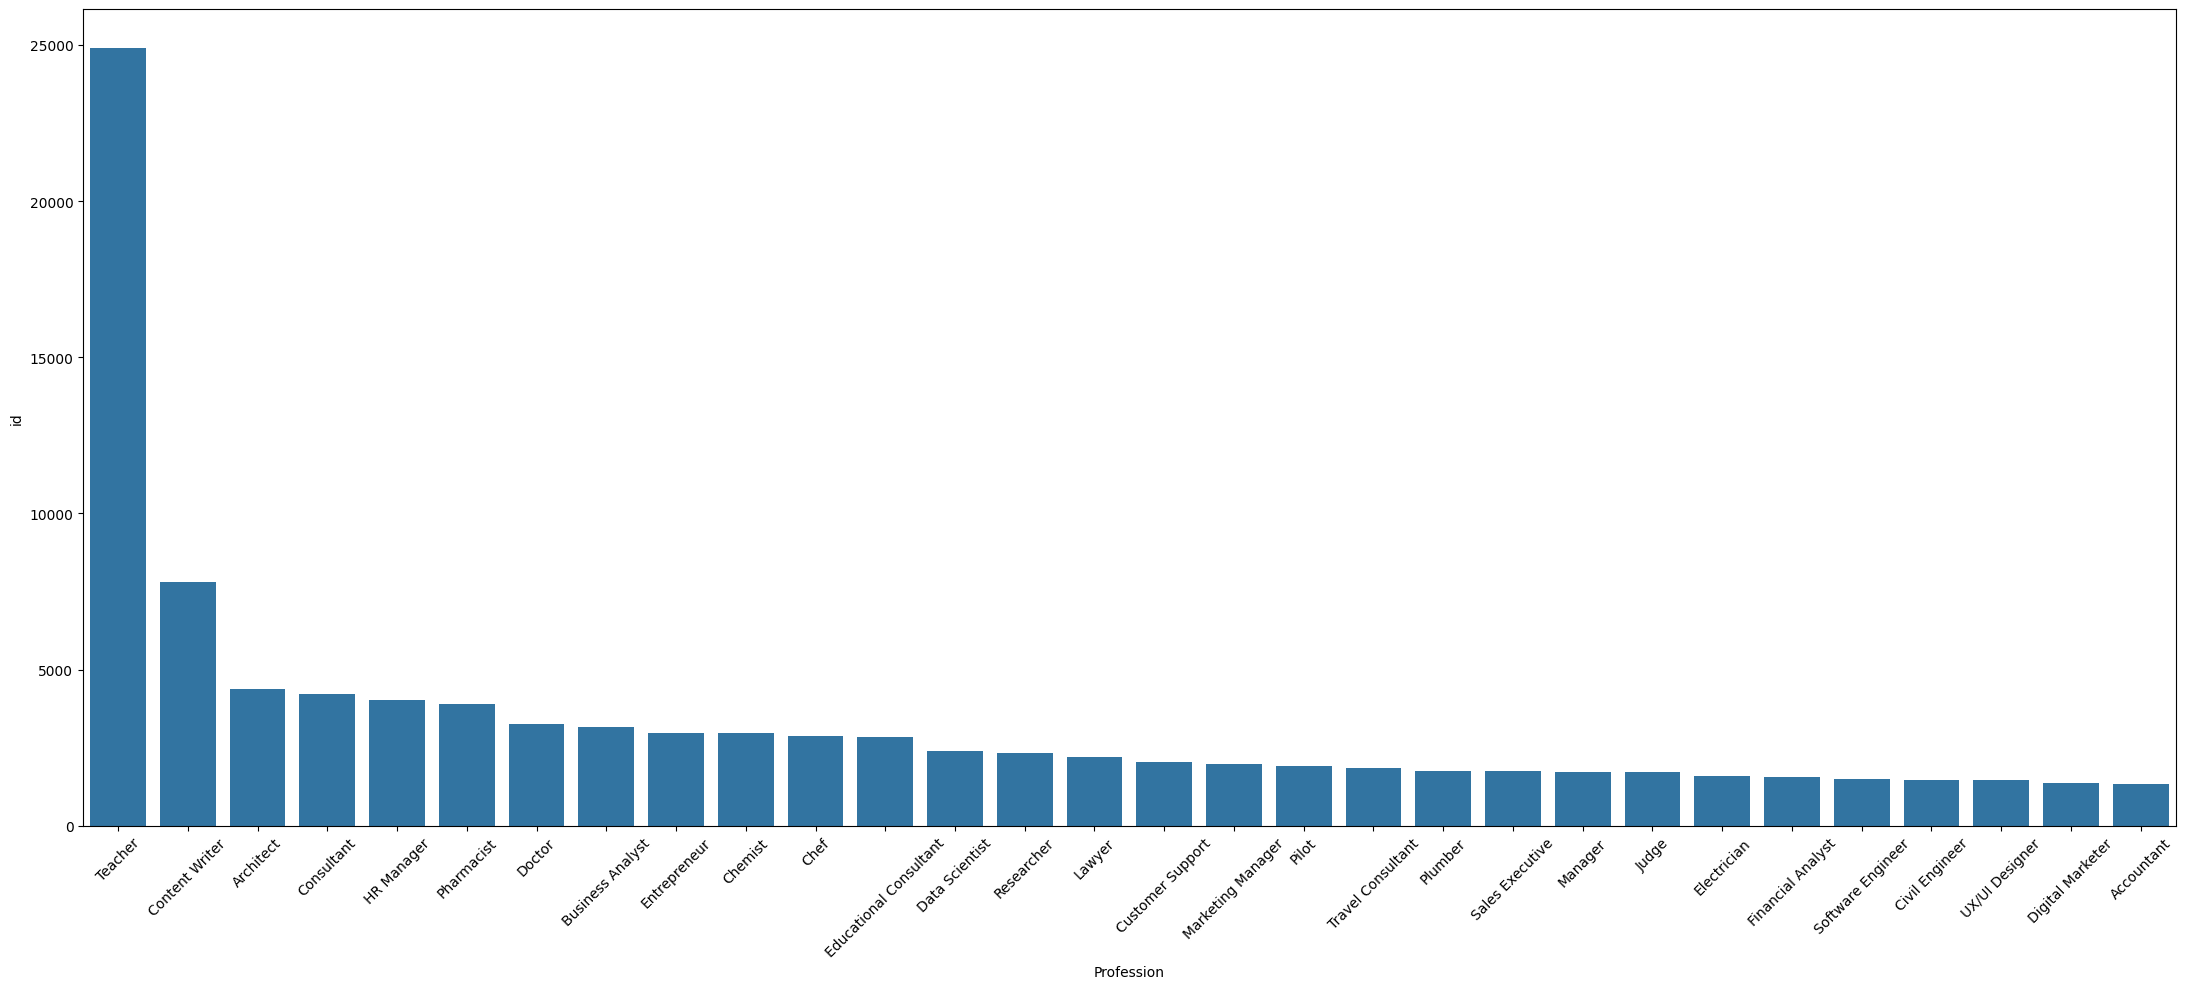

In [10]:
#removing same profession as name like yogesh name and yogesh as profession & places
MH_data=MH_data[MH_data['Profession'] != MH_data['Name']]
MH_data=MH_data[~MH_data['Profession'].isin(["Pranav","Yogesh","Nagpur","Patna","Visakhapatnam"])]

#for test data
#test_data=test_data[test_data['Profession'] != test_data['Name']]
#test_data=test_data[~test_data['Profession'].isin(['24th', 'Manvi', 'Samar', 'Surat','No','Name'])]


# profession analysis
a=MH_data.groupby('Profession')['id'].count().reset_index().sort_values(by="id",ascending=False)
b=pd.DataFrame(a)

#top most profession
sns.barplot(y='id',x='Profession',data=b.head(30))
plt.xticks(rotation=45)     # if x-axis has text labels
plt.tight_layout()
plt.savefig("top most profession.png", dpi=300, bbox_inches='tight')
plt.show()

#test_data['Profession'].unique()

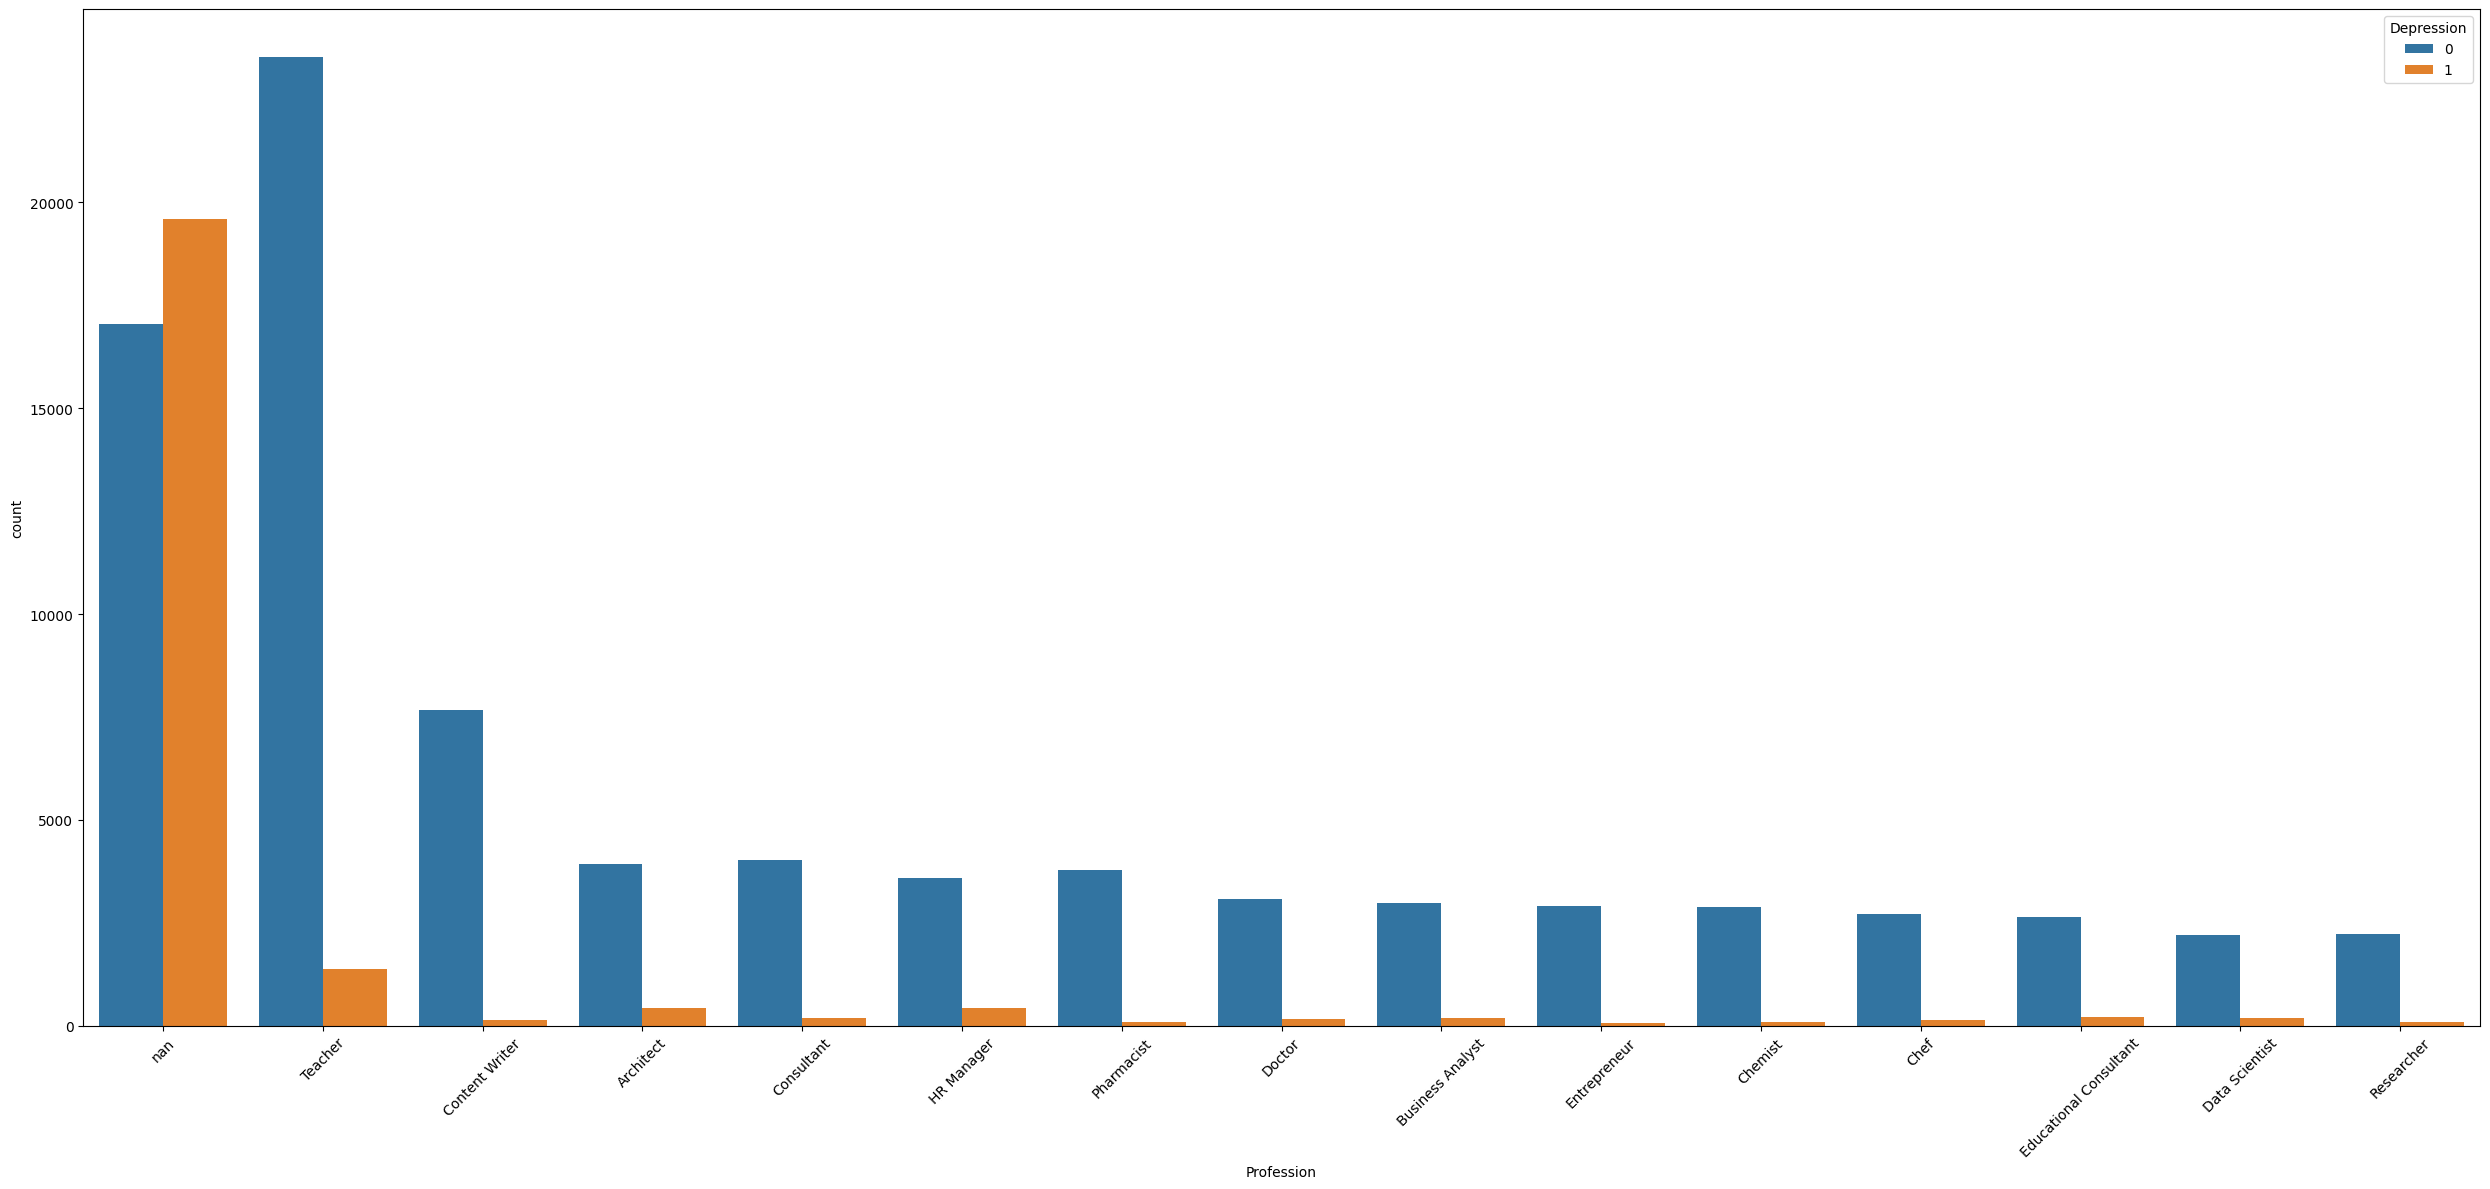

<Figure size 2500x1200 with 0 Axes>

In [20]:
#   proffesion wise depression

# Step 1: Filter top 15 professions by count
top_professions = MH_data['Profession'].astype(str).value_counts().head(15).index

# Step 2: Filter original data to keep only those top professions
filtered_data = MH_data[MH_data['Profession'].astype(str).isin(top_professions)].copy()

# Step 3: Convert Profession column to string (to avoid mixed types)
filtered_data['Profession'] = filtered_data['Profession'].astype(str)

plt.figure(figsize=(25, 12))  # Step 4: Set figure size before plotting
sns.countplot(data=filtered_data, x='Profession', hue='Depression', order=top_professions)  # Step 5: Create the barplot
plt.xticks(rotation=45)  # # Step 6: Rotate x-axis labels and finalize plot
plt.tight_layout()
plt.show()

plt.savefig("proffesion wise depression.png", dpi=300, bbox_inches='tight')
plt.show()

In [35]:
sleep=MH_data['Sleep Duration'].value_counts().sort_values(ascending=False).head(10).reset_index()
sleep

,Sleep Duration,count
0,Less than 5 hours,38780
1,7-8 hours,36966
2,More than 8 hours,32726
3,5-6 hours,32138
4,3-4 hours,12
5,6-7 hours,8
6,4-5 hours,7
7,4-6 hours,5
8,2-3 hours,5
9,6-8 hours,4


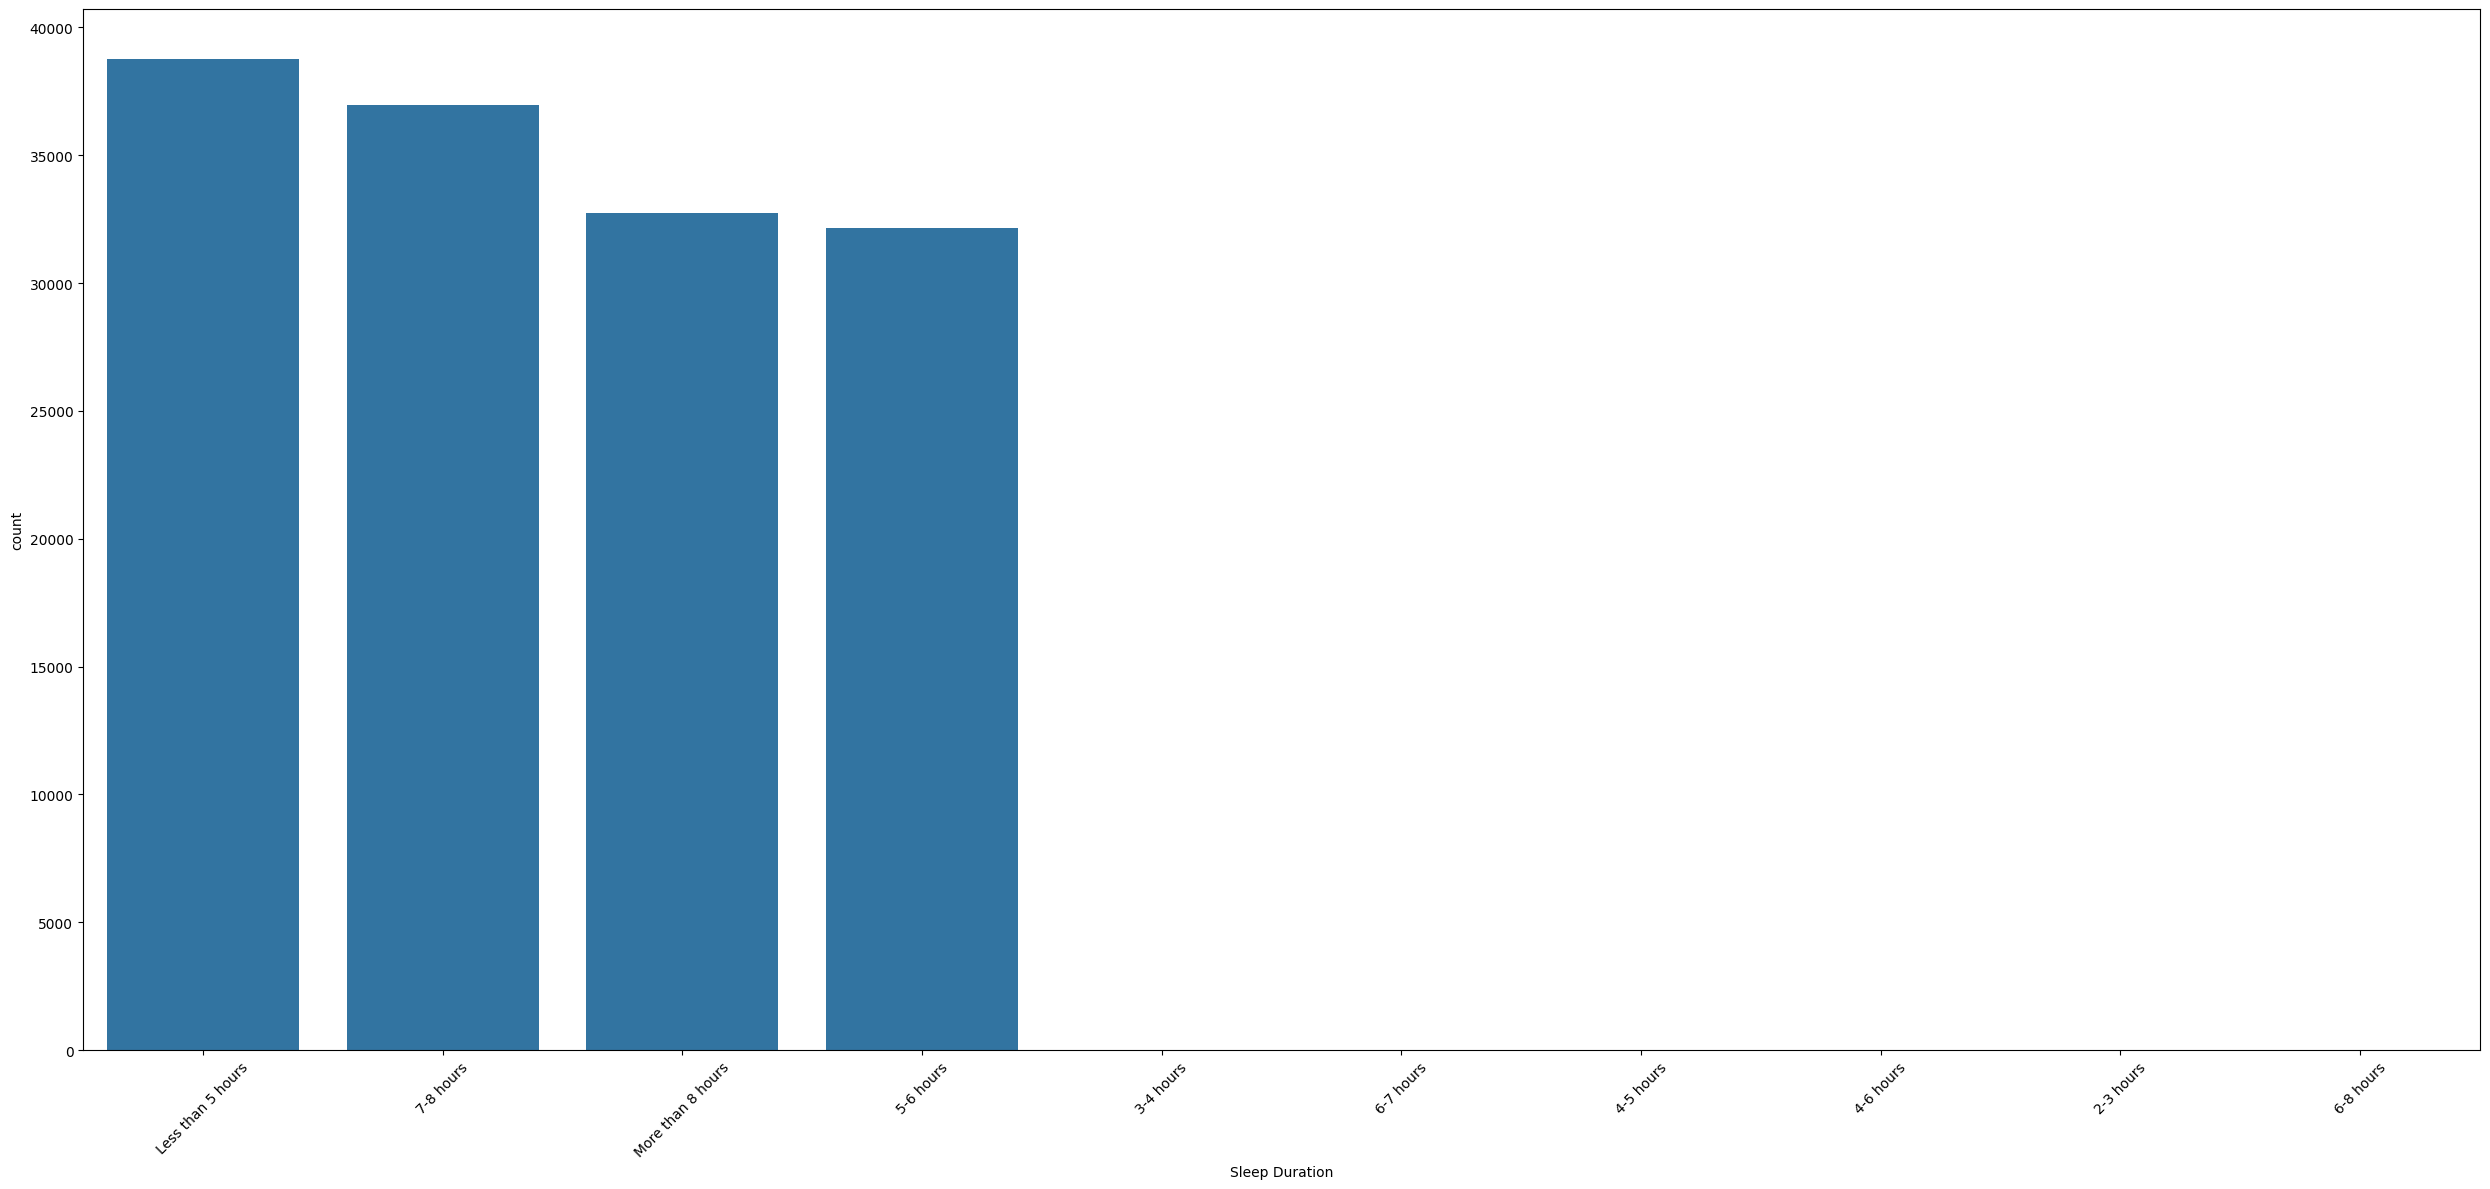

In [40]:
#sleep duration
sns.barplot(x=sleep['Sleep Duration'],y=sleep['count'],data=MH_data)
plt.xticks(rotation=45)     # if x-axis has text labels
plt.tight_layout()
plt.rcParams['figure.figsize'] = (25,12)
plt.savefig("sleep duration time.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#removing outlier by observing above charts
MH_data=MH_data[MH_data['Sleep Duration'].isin(["More than 8 hours","Less than 5 hours","5-6 hours","7-8 hours","3-4 hours"])]

#for test data
#test_data=test_data[test_data['Sleep Duration'].isin(["More than 8 hours","Less than 5 hours","5-6 hours","7-8 hours","3-4 hours"])]

MH_data['Sleep Duration'].unique()
test_data['Sleep Duration'].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       '0', 'Meerut', '9-5 hours', '6-7 hours', '60-65 hours', 'Vivan',
       '3-4 hours', '1-6 hours', '9-5', 'Unhealthy', '8-9 hours',
       '4-5 hours', 'than 5 hours', '9-6 hours', '1-2 hours',
       '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours',
       '10-6 hours', '1-3 hours', '6 hours', '50-75 hours', '4-6 hours',
       '2-3 hours', '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [51]:
city_count=MH_data['City'].value_counts().sort_values(ascending=False).head(31).reset_index()
city_count

,City,count
0,Kalyan,6591
1,Patna,5922
2,Vasai-Virar,5764
3,Kolkata,5689
4,Ahmedabad,5612
5,Meerut,5528
6,Ludhiana,5226
7,Pune,5210
8,Rajkot,5206
9,Visakhapatnam,5175


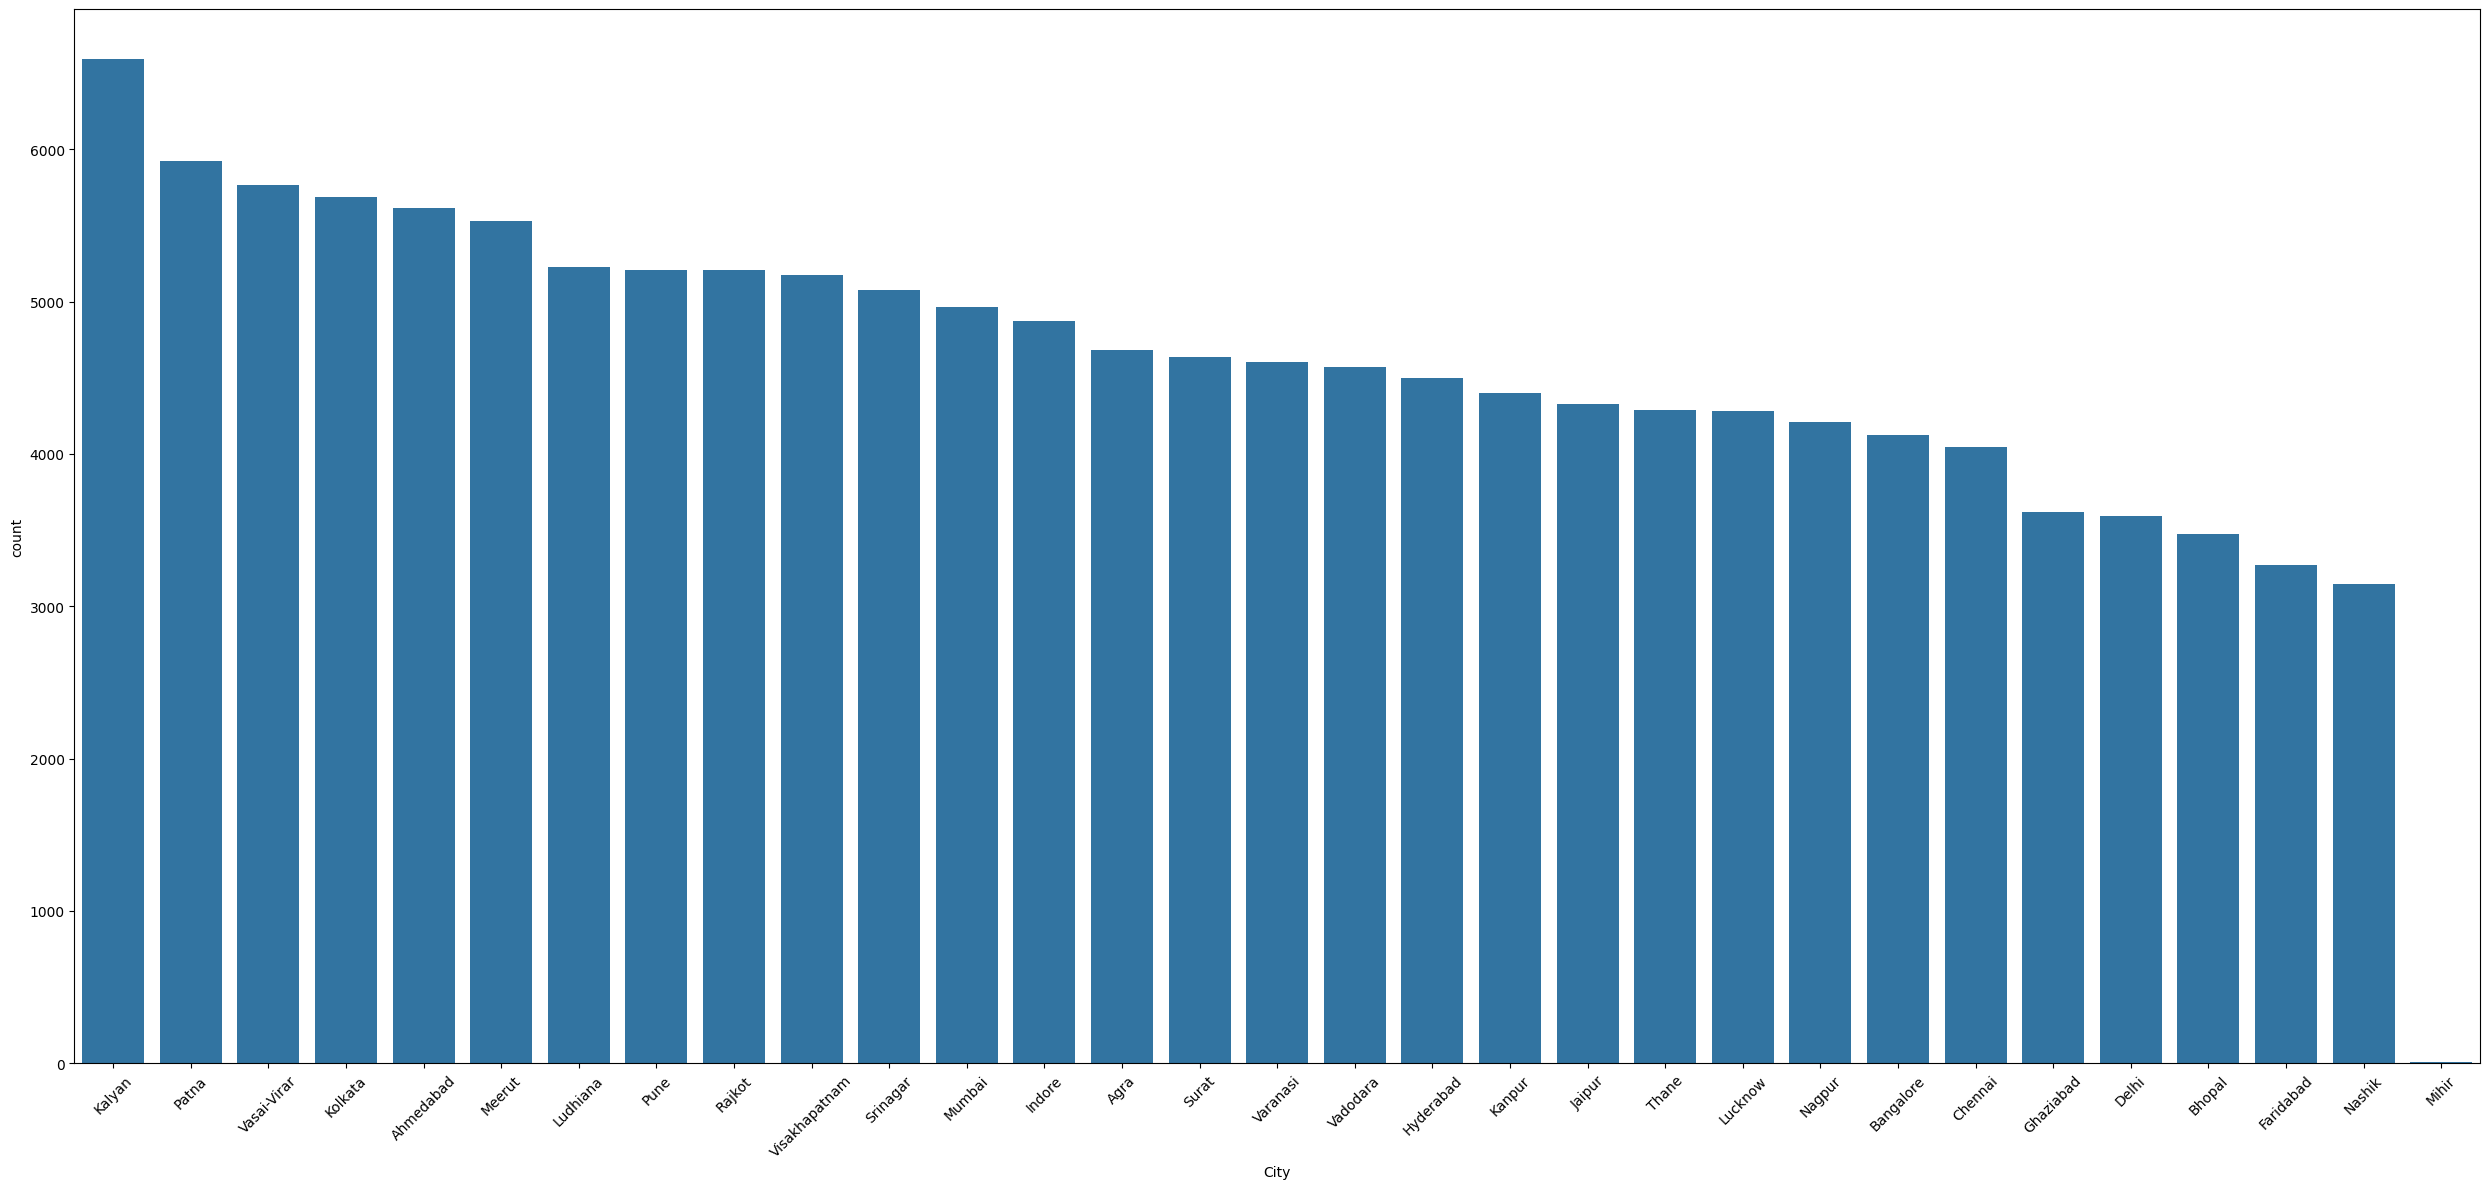

In [54]:
sns.barplot(x=city_count['City'],y=city_count['count'],data=MH_data)
plt.xticks(rotation=45)     # if x-axis has text labels
plt.tight_layout()
plt.savefig("valid city.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
z=MH_data.groupby("City")["id"].count().reset_index().sort_values(by='id',ascending=False)
z.head(30)         # after 30 there are unnecessary entry
MH_data=MH_data[MH_data['City'].isin(z['City'].head(30))]
MH_data['City'].unique()

#test_data=test_data[test_data['City'].isin(z['City'].head(30))]
#test_data['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore'], dtype=object)

In [ ]:
MH_data['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

In [ ]:
#removing name col because it is not used is in our model
MH_data=MH_data.drop("Name",axis=1)

test_data=test_data.drop("Name",axis=1)
test_data.head(1)

,id,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes


In [ ]:
#selecting input and target columns name
input_cols=MH_data.columns[1:-1].to_list()
target_col ='Depression'

In [ ]:
#assign input and target columns
train_input=MH_data[input_cols].copy()   # train
train_target=MH_data[target_col].copy()


test_input=test_data[input_cols].copy()  #test
train_input.shape

(140524, 17)

In [ ]:
#test_data[input_cols].count()

In [ ]:
test_input.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
# numerical cols and categorical cols
cat_cols=train_input.select_dtypes(include='object').columns.tolist()
num_cols=train_input.columns[~train_input.columns.isin(cat_cols)].tolist()   # logic for numeric col after getting cat_cols
#cat_cols
#num_cols

In [ ]:
# create pipeline for num and cat cols
from sklearn.pipeline import Pipeline
# num cols
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

cat_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

preposessor=ColumnTransformer(
    transformers=[
        ('num',num_pipeline,num_cols),
        ('cat',cat_pipeline,cat_cols)
    ]
)

In [ ]:
# load datasets (processed)
x_train=preposessor.fit_transform(train_input)
x_test = preposessor.transform(test_input)

In [ ]:
x_train

array([[0.73809522, 0.53563094, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19047619, 0.53563094, 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.35714287, 1.        , 0.4997004 , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.14285715, 0.53563094, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.73809522, 0.53563094, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.21428572, 0.75      , 0.4997004 , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
#   gradient boosting (  xgb classifier model  )
from xgboost import XGBClassifier
model1=XGBClassifier(random_state=11,n_jobs=-1,objective='binary:logistic',eval_metric='logloss',colsample_bytree=0.8,subsample=0.9,gamma=0.1,
                     n_estimetors=400,max_depth=3,learning_rate=0.3,)
print('train model1')

train model1


In [ ]:
#   catboost (  catboost classifier model  )
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=200, learning_rate=0.3, depth=7, random_seed=11, subsample=0.9,
                            colsample_bylevel=0.8, l2_leaf_reg=0.1, eval_metric='Logloss', loss_function='Logloss', verbose=0, task_type='CPU')
print('train model2')

train model2


In [ ]:
# Define stacking ensemble with the LightGBM model tuned in this trial
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_ensemble = StackingClassifier(
    estimators=[
        ('catboost', model2),
        ('xgb', model1)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False,
    n_jobs=-1
)


In [ ]:
stacking_ensemble

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7944ab735710>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=0.1,
                                              gro...
                                              interaction_constraints=None,
                                              learning_rate=0.3, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None,
                                              n_estimetors=400, n_jobs=-1,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
# evaluation model function
from sklearn.metrics import accuracy_score,make_scorer

# Define a scoring metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, x_train, train_target, cv=5, scoring=scoring)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetors" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetors" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetors" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetors" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetors" } are not used.



In [ ]:
print("CV Accuracy scores :",cv_scores)
print("Mean CV Accuracy:",cv_scores.mean())

CV Accuracy scores : [0.93762676 0.93990393 0.93823163 0.93915673 0.94146741]
Mean CV Accuracy: 0.9392772920648053


In [ ]:
#fit the model
model1.fit(x_train, train_target)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetors" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_estimetors=400, n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
test_preds=model1.predict(x_test)

In [ ]:
#for submission
sub_df=pd.read_csv('/content/playground-series-s4e11/sample_submission.csv')
sub_df['Depression']=test_preds
sub_df.to_csv('xgb_structured.csv',index=None)

In [ ]:
def pred_input(model,single_input):
  input_df=pd.DataFrame(single_input)
  input_df=input_df.drop("Name",axis=1)
  input_cols=input_df.columns[1:].to_list()
  input_df=input_df[input_cols]

  x_single_input = preposessor.transform(input_df)
  pred=model1.predict(x_single_input)
  prob=model1.predict_proba(x_single_input)

  lable='Depressed' if int(pred[0]) else 'Not Depressed'
  probability=prob[0][pred[0]]
  return f'{lable} with {probability:.4f} % sure'

In [ ]:
from math import nan

single_inpute={
    'id': np.nan,
    'Name':'Rohan',
    'Gender': 'Female',
    'Age': 26.0,
    'City': 'Varanasi',
    'Working Professional or Student': 'Working Professional',
    'Profession':'Teacher',
    'Academic Pressure':np.nan,
    'Work Pressure':5.0,
    'CGPA':np.nan,
    'Study Satisfaction':np.nan,
    'Job Satisfaction':2.0,
    'Sleep Duration':'Less than 5 hours',
    'Dietary Habits':'Moderate',
    'Degree':'LLB',
    'Have you ever had suicidal thoughts ?':'No',
    'Work/Study Hours':8.0,
    'Financial Stress':2.0,
    'Family History of Mental Illness':'Yes'
}

In [ ]:
1	Vivan	Male	26.0	Varanasi	Working Professional	Teacher	NaN	4.0	NaN	NaN	3.0	Less than 5 hours	Unhealthy	LLB	Yes	7.0	3.0	No	1

In [ ]:
pred_input(model1,[single_inpute])

'not depressed with 0.7704 % sure'